In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

import zipfile_deflate64 as zipfile
from urllib.request import urlretrieve

%matplotlib inline

In [2]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assets....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with zipfile.ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)
URL = r"https://www.dropbox.com/s/xoomeq2ids9551y/opencv_bootcamp_assets_NB13.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), f"opencv_bootcamp_assets_NB13.zip")

# Download if assest ZIP does not exists. 
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)   

In [3]:
classFile = "coco_class_labels.txt"

with open(classFile) as fp:
    labels = fp.read().split("\n")

print(labels)

['unlabeled', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'street sign', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'hat', 'backpack', 'umbrella', 'shoe', 'eye glasses', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'plate', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'mirror', 'dining table', 'window', 'desk', 'toilet', 'door', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'blender', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush', 'hair brush', '']


In [4]:
modelFile  = os.path.join("models", "ssd_mobilenet_v2_coco_2018_03_29", "frozen_inference_graph.pb")
configFile = os.path.join("models", "ssd_mobilenet_v2_coco_2018_03_29.pbtxt")
net = cv2.dnn.readNetFromTensorflow(modelFile, configFile)

In [5]:
def detect_objects(net, im, dim = 300):
    blob = cv2.dnn.blobFromImage(im, 1.0, size=(dim, dim), mean=(0, 0, 0), swapRB=True, crop=False)
    net.setInput(blob)
    objects = net.forward()
    return objects


In [6]:
FONTFACE = cv2.FONT_HERSHEY_SIMPLEX
FONTSCALE = 0.5
THICKNESS = 1

In [9]:
def display_text(im, text, x, y):
    textSize = cv2.getTextSize(text, FONTFACE, FONTSCALE, THICKNESS)
    dim = textSize[0]
    baseline = textSize[1]

    cv2.rectangle(
        im,
        (x, y - dim[1] - baseline),
        (x + dim[0], y + baseline),
        (0, 0, 0),
        cv2.FILLED,
    )

    # Display text inside the rectangle
    cv2.putText(
        im,
        text,
        (x, y - 5),
        FONTFACE,
        FONTSCALE,
        (0, 255, 255),
        THICKNESS,
        cv2.LINE_AA,
    )


In [10]:
def display_objects(im, objects, threshold=0.25):
    rows = im.shape[0]
    cols = im.shape[1]

    for i in range(objects.shape[2]):
        # Find the class and confidence
        classId = int(objects[0, 0, i, 1])
        score = float(objects[0, 0, i, 2])

        # Recover original coordinates from normalized coordinates
        x = int(objects[0, 0, i, 3] * cols)
        y = int(objects[0, 0, i, 4] * rows)
        w = int(objects[0, 0, i, 5] * cols - x)
        h = int(objects[0, 0, i, 6] * rows - y)

        # Check if detection is of good quality
        if score > threshold:
            display_text(im, "{}".format(labels[classId]), x, y)
            cv2.rectangle(im, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Convert Image to RGB since we are using Matplotlib for displaying image
    mp_img = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(30, 10))
    plt.imshow(mp_img)
    plt.show()

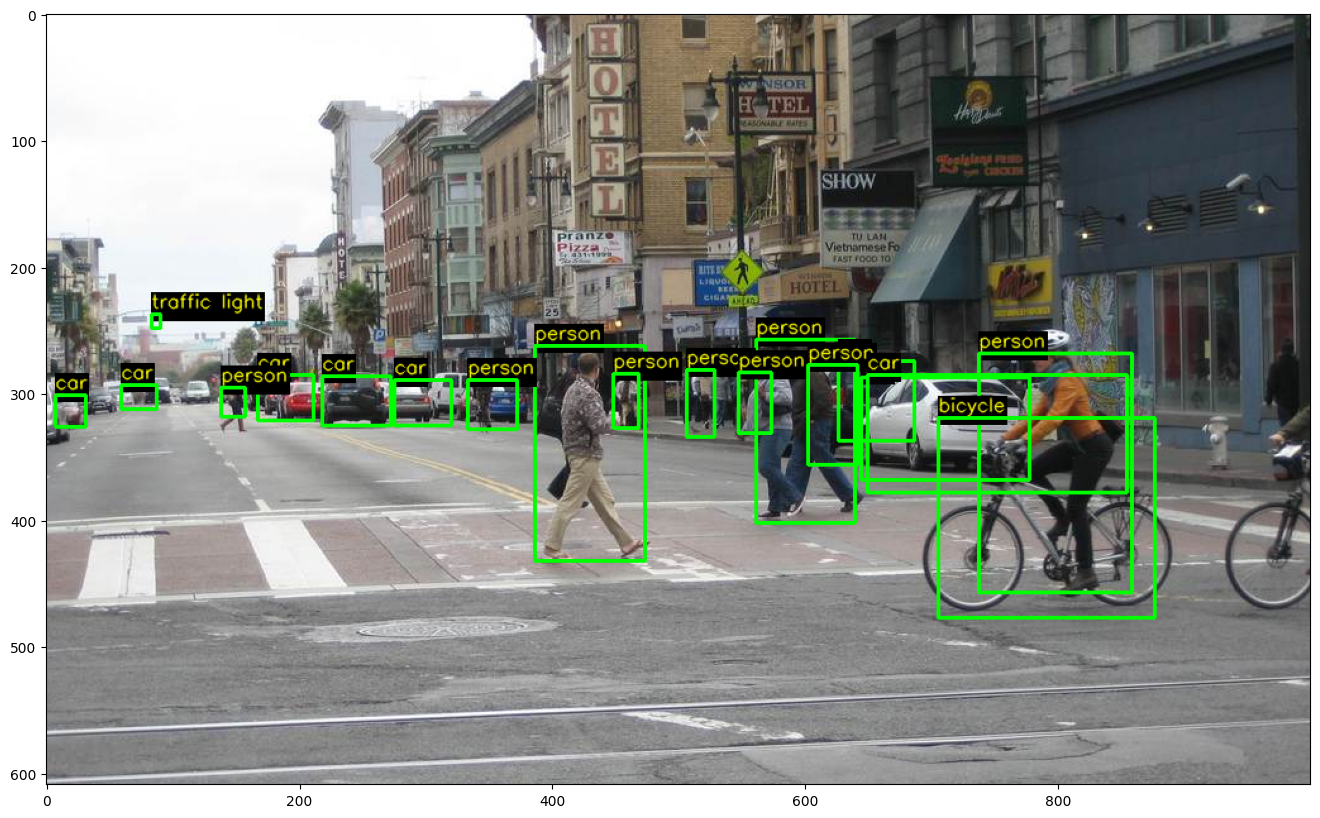

In [13]:
im = cv2.imread(os.path.join("images", "street.jpg"))
objects = detect_objects(net, im)
display_objects(im, objects)

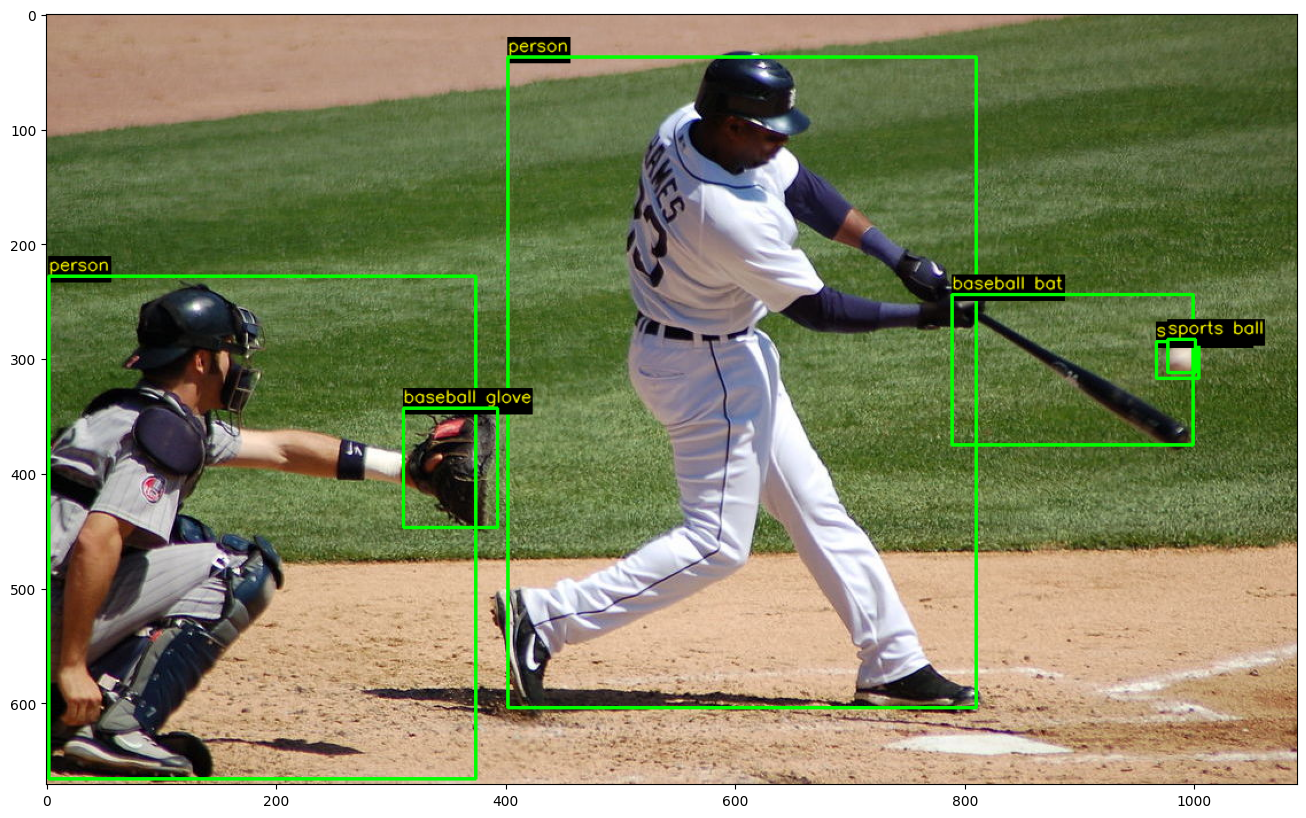

In [14]:
im = cv2.imread(os.path.join("images", "baseball.jpg"))
objects = detect_objects(net, im)
display_objects(im, objects)

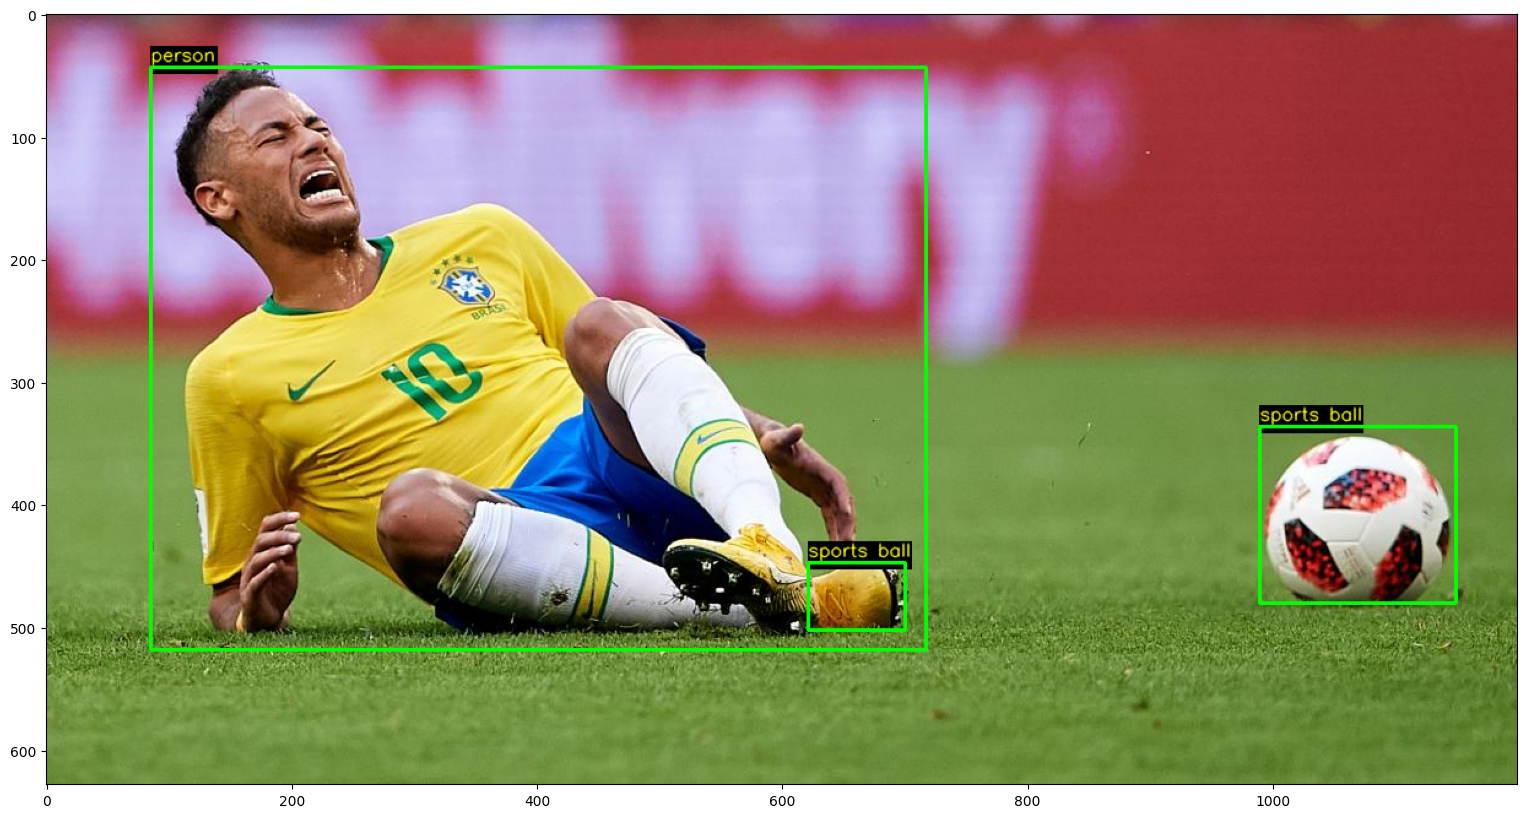

In [15]:
im = cv2.imread(os.path.join("images", "soccer.jpg"))
objects = detect_objects(net, im)
display_objects(im, objects)